# Dataproject

In this project we will examine the relationship between pension funds and the share index of stocks. More specifically, the Intersectoral pension funds and the Corporate pension funds compared to the OMXC share index.

In [7]:
#Installing programs in Anaconda Promt. 
#(1): pip install pandas-datareader
#(2): pip install git+https://github.com/elben10/pydst

#Importing used packages.
import numpy as np
import pandas as pd
import pandas_datareader # install in (1).
import pydst # install in (2).
import datetime
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject as dp
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# We use the Python module pydst for assesing the API of Denmark's statistics.
Dst = pydst.Dst(lang='en') # Setting english language

# This data is organized into Tables and Subjects indexed by numbers so we use the following to see the list.
Overview=Dst.get_subjects()
dp.Overview

id                                       desc  active  hasSubjects
0   02                   Population and elections    True         True
1   05                          Living conditions    True         True
2   03                    Education and knowledge    True         True
3   18                Culture and National Church    True         True
4   04                  Labour, income and wealth    True         True
5   06                     Prices and consumption    True         True
6   14  National accounts and government finances    True         True
7   16                    Money and credit market    True         True
8   13                           External economy    True         True
9   07                 Business sector in general    True         True
10  11                           Business sectors    True         True
11  01          Geography, environment and energy    True         True
12  19                                      Other    True         True

In [10]:
# We choose the main dataset for "Money and credit markets" with subject=16 seen below.
Theme=Dst.get_tables(subjects=['16']) 
dp.Theme

id                                               text      unit  \
0    DNVPDKS                           VP-registered securities     m DKK   
1    DNVPDKR                           VP-registered securities     m DKK   
2    DNVPDKU                           VP-registered securities  DKK mio.   
3    DNVPDKF             VP-registered securities by ISIN codes     m DKK   
4   DNVPDKBR                           VP-registered securities     m DKK   
..       ...                                                ...       ...   
92     MPK51          Balance sheet of life assurance companies     m DKK   
93     MPK52  Result on loss account of non-life insurance c...     m DKK   
94     MPK53      Balance sheet of non-life insurance companies     m DKK   
95     MPK49                                     Pensions funds     m DKK   
96     MPK55                     Financial sector, main figures   DKK bn.   

               updated firstPeriod latestPeriod  active  \
0  2020-05-04 08:00:00     1999M12      2020M03    True   
1  2020-05-04 08:00:00     1999M12      2020M03    True   
2  2020-05-01 08:00:00     1999M12      2020M03    True   
3  2020-05-01 08:00:00     2005M01      2020M03    True   
4  2020-05-04 08:00:00     2008M11      2020M03    True   
..                 ...         ...          ...     ...   
92 2019-12-16 08:00:00        2001         2018    True   
93 2019-12-16 08:00:00        2001         2018    True   
94 2019-12-16 08:00:00        2001         2018    True   
95 2019-12-16 08:00:00        2000         2018    True   
96 2019-12-16 08:00:00        2001         2018    True   

                                            variables  
0   [type of security, coupon, currency, maturity,...  
1   [type of security, coupon, currency, maturity,...  
2             [type of security, issuer sector, time]  
3                  [ISIN_NAME, investor sector, time]  
4   [type of security, currency, issuer industry, ...  
..                                                ...  
92                         [assets/liabilities, time]  
93                        [revenue/expenditure, time]  
94                         [assets/liabilities, time]  
95                   [assets/liabilities, type, time]  
96                          [institution, type, time]  

[97 rows x 8 columns]

In the following, we will firstly Dataclean Table(1) consisting of the pension funds selected. Next, we will Dataclean Table(2) consisting of the share index. Lastly, we will merge the two for a great overview before the analysis.

## DataCleaning Table(1)


In [11]:
# Then we choose the subdataset for "Pension funds" with id=MPK49 that is shown below.
Subject_1=Theme[Theme.id == 'MPK49'] 
dp.Subject_1

id            text   unit             updated firstPeriod latestPeriod  \
95  MPK49  Pensions funds  m DKK 2019-12-16 08:00:00        2000         2018   

    active                         variables  
95    True  [assets/liabilities, type, time]

To begin with, we look through the table we have chosen, to find the variables we want to inspect.

In [12]:
# So, we can examine the variables in more depth. 
Vars_1 = Dst.get_variables(table_id = 'MPK49')
Vars_1.values
dp.Vars_1.values

array([['AKTPAS', 'assets/liabilities', False, False,
        list([{'id': '5180', 'text': 'Number of members'}, {'id': '5190', 'text': 'Number of working members'}, {'id': '5200', 'text': 'Number of retired members'}, {'id': '5210', 'text': 'Number of retired spouses'}, {'id': '5220', 'text': 'Number of children who receive childrens pension'}, {'id': '5230', 'text': 'Current annual pension, total'}, {'id': '5240', 'text': 'Pension for members'}, {'id': '5250', 'text': 'Pension for spouses'}, {'id': '5260', 'text': 'Pension for children'}, {'id': '5270', 'text': 'Member contributions (miscellaneous income)'}, {'id': '5280', 'text': 'Of which extraordinary contributions'}, {'id': '5290', 'text': 'Interest income and profits (miscellaneous income)'}, {'id': '5300', 'text': 'Pensions (miscellaneous expenditure)'}, {'id': '5310', 'text': 'retirement allowances (miscellaneous expenditure)'}, {'id': '5320', 'text': 'Assets, total'}, {'id': '5330', 'text': 'Central government bonds (book val

**Following, we begin reducing and combining our tables in order to end up with a table where all the data is cleaned.**

In [13]:
# Now we are retrieving data from the above mentioned subject and subset - we will create an unsorted table. 
Data_1 = Dst.get_data(table_id = 'MPK49', variables={'AKTPAS':['5320'], 'TID':['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',], 'TYPE':['5410', '5420']})
# Rename the variables of the dataset.
Data_1.rename(columns={'AKTPAS':'Assets & Liabilities','TID':'Year','TYPE':'Type','INDHOLD':'Amount'},inplace=True)
dp.Data_1

Assets & Liabilities  Year                          Type  Amount
0         Assets, total  2000  Intersectoral pension funds   269482
1         Assets, total  2000       Corporate pension funds   43315
2         Assets, total  2001  Intersectoral pension funds   272145
3         Assets, total  2001       Corporate pension funds   39984
4         Assets, total  2002  Intersectoral pension funds   277018
5         Assets, total  2002       Corporate pension funds   37077
6         Assets, total  2003  Intersectoral pension funds   301892
7         Assets, total  2003       Corporate pension funds   38191
8         Assets, total  2004  Intersectoral pension funds   339245
9         Assets, total  2004       Corporate pension funds   39185
10        Assets, total  2005  Intersectoral pension funds   381048
11        Assets, total  2005       Corporate pension funds   42474
12        Assets, total  2006  Intersectoral pension funds   402367
13        Assets, total  2006       Corporate pension funds   42920
14        Assets, total  2007  Intersectoral pension funds   412251
15        Assets, total  2007       Corporate pension funds   43027
16        Assets, total  2008  Intersectoral pension funds   395954
17        Assets, total  2008       Corporate pension funds   42714
18        Assets, total  2009  Intersectoral pension funds   435996
19        Assets, total  2009       Corporate pension funds   45328
20        Assets, total  2010  Intersectoral pension funds   439697
21        Assets, total  2010       Corporate pension funds   50789
22        Assets, total  2011  Intersectoral pension funds   555614
23        Assets, total  2011       Corporate pension funds   53019
24        Assets, total  2012  Intersectoral pension funds   565033
25        Assets, total  2012       Corporate pension funds   57381
26        Assets, total  2013  Intersectoral pension funds   585232
27        Assets, total  2013       Corporate pension funds   52661
28        Assets, total  2014  Intersectoral pension funds   646091
29        Assets, total  2014       Corporate pension funds   59433
30        Assets, total  2015  Intersectoral pension funds   671570
31        Assets, total  2015       Corporate pension funds   59821
32        Assets, total  2016  Intersectoral pension funds   691892
33        Assets, total  2016       Corporate pension funds   59133

In [14]:
# Change the index of the table to the variables 'Year' for now. 
Index_1 = Data_1.set_index('Year')
dp.Index_1

Assets & Liabilities                          Type  Amount
Year                                                           
2000        Assets, total  Intersectoral pension funds   269482
2000        Assets, total       Corporate pension funds   43315
2001        Assets, total  Intersectoral pension funds   272145
2001        Assets, total       Corporate pension funds   39984
2002        Assets, total  Intersectoral pension funds   277018
2002        Assets, total       Corporate pension funds   37077
2003        Assets, total  Intersectoral pension funds   301892
2003        Assets, total       Corporate pension funds   38191
2004        Assets, total  Intersectoral pension funds   339245
2004        Assets, total       Corporate pension funds   39185
2005        Assets, total  Intersectoral pension funds   381048
2005        Assets, total       Corporate pension funds   42474
2006        Assets, total  Intersectoral pension funds   402367
2006        Assets, total       Corporate pension funds   42920
2007        Assets, total  Intersectoral pension funds   412251
2007        Assets, total       Corporate pension funds   43027
2008        Assets, total  Intersectoral pension funds   395954
2008        Assets, total       Corporate pension funds   42714
2009        Assets, total  Intersectoral pension funds   435996
2009        Assets, total       Corporate pension funds   45328
2010        Assets, total  Intersectoral pension funds   439697
2010        Assets, total       Corporate pension funds   50789
2011        Assets, total  Intersectoral pension funds   555614
2011        Assets, total       Corporate pension funds   53019
2012        Assets, total  Intersectoral pension funds   565033
2012        Assets, total       Corporate pension funds   57381
2013        Assets, total  Intersectoral pension funds   585232
2013        Assets, total       Corporate pension funds   52661
2014        Assets, total  Intersectoral pension funds   646091
2014        Assets, total       Corporate pension funds   59433
2015        Assets, total  Intersectoral pension funds   671570
2015        Assets, total       Corporate pension funds   59821
2016        Assets, total  Intersectoral pension funds   691892
2016        Assets, total       Corporate pension funds   59133

In [15]:
# Sort the dataset to get a more clear order in the dataset. 
Sort = Index_1[['Type','Assets & Liabilities','Amount']]
dp.Sort

Type Assets & Liabilities  Amount
Year                                                           
2000  Intersectoral pension funds         Assets, total  269482
2000       Corporate pension funds        Assets, total   43315
2001  Intersectoral pension funds         Assets, total  272145
2001       Corporate pension funds        Assets, total   39984
2002  Intersectoral pension funds         Assets, total  277018
2002       Corporate pension funds        Assets, total   37077
2003  Intersectoral pension funds         Assets, total  301892
2003       Corporate pension funds        Assets, total   38191
2004  Intersectoral pension funds         Assets, total  339245
2004       Corporate pension funds        Assets, total   39185
2005  Intersectoral pension funds         Assets, total  381048
2005       Corporate pension funds        Assets, total   42474
2006  Intersectoral pension funds         Assets, total  402367
2006       Corporate pension funds        Assets, total   42920
2007  Intersectoral pension funds         Assets, total  412251
2007       Corporate pension funds        Assets, total   43027
2008  Intersectoral pension funds         Assets, total  395954
2008       Corporate pension funds        Assets, total   42714
2009  Intersectoral pension funds         Assets, total  435996
2009       Corporate pension funds        Assets, total   45328
2010  Intersectoral pension funds         Assets, total  439697
2010       Corporate pension funds        Assets, total   50789
2011  Intersectoral pension funds         Assets, total  555614
2011       Corporate pension funds        Assets, total   53019
2012  Intersectoral pension funds         Assets, total  565033
2012       Corporate pension funds        Assets, total   57381
2013  Intersectoral pension funds         Assets, total  585232
2013       Corporate pension funds        Assets, total   52661
2014  Intersectoral pension funds         Assets, total  646091
2014       Corporate pension funds        Assets, total   59433
2015  Intersectoral pension funds         Assets, total  671570
2015       Corporate pension funds        Assets, total   59821
2016  Intersectoral pension funds         Assets, total  691892
2016       Corporate pension funds        Assets, total   59133

Now we create two datasets from the before mentioned table ('Data') where we sort the data tables into corporate and intersectoral pension funds.

In [19]:
# Cleaning the table of corporate pension funds
Corporate = Sort[Sort['Type']=='Corporate pension funds'].sort_values(['Year','Type'])
Corp = pd.DataFrame(Corporate).rename(columns={'Amount': 'Corporate pension funds in mio kr.'})
Corp_Reduc = Corp.drop('Type',axis=1)
# Displaying the table:
dp.Corp_Reduc

Assets & Liabilities  Corporate pension funds in mio kr.
Year                                                         
2000        Assets, total                               43315
2001        Assets, total                               39984
2002        Assets, total                               37077
2003        Assets, total                               38191
2004        Assets, total                               39185
2005        Assets, total                               42474
2006        Assets, total                               42920
2007        Assets, total                               43027
2008        Assets, total                               42714
2009        Assets, total                               45328
2010        Assets, total                               50789
2011        Assets, total                               53019
2012        Assets, total                               57381
2013        Assets, total                               52661
2014        Assets, total                               59433
2015        Assets, total                               59821
2016        Assets, total                               59133

In [20]:
# Cleaning the table of intersectoral pension funds
Intersectoral = Sort[Sort['Type']=='Intersectoral pension funds '].sort_values(['Year','Type'])
Inter = pd.DataFrame(Intersectoral).rename(columns={'Amount': 'Intersectoral pension funds in mio kr.'})
Inter_Reduc = Inter.drop('Type', axis=1)
# Displaying the table:
dp.Inter_Reduc

Assets & Liabilities  Intersectoral pension funds in mio kr.
Year                                                             
2000        Assets, total                                  269482
2001        Assets, total                                  272145
2002        Assets, total                                  277018
2003        Assets, total                                  301892
2004        Assets, total                                  339245
2005        Assets, total                                  381048
2006        Assets, total                                  402367
2007        Assets, total                                  412251
2008        Assets, total                                  395954
2009        Assets, total                                  435996
2010        Assets, total                                  439697
2011        Assets, total                                  555614
2012        Assets, total                                  565033
2013        Assets, total                                  585232
2014        Assets, total                                  646091
2015        Assets, total                                  671570
2016        Assets, total                                  691892

In [22]:
# We merge the two datasets into one collective table. 
Pension = pd.concat([Inter_Reduc, Corp_Reduc], axis=1)
Pen_Reduc = Pension.drop('Assets & Liabilities', axis =1)
# Displaying the merged table:
dp.Pen_Reduc

Intersectoral pension funds in mio kr.  \
Year                                           
2000                                  269482   
2001                                  272145   
2002                                  277018   
2003                                  301892   
2004                                  339245   
2005                                  381048   
2006                                  402367   
2007                                  412251   
2008                                  395954   
2009                                  435996   
2010                                  439697   
2011                                  555614   
2012                                  565033   
2013                                  585232   
2014                                  646091   
2015                                  671570   
2016                                  691892   

      Corporate pension funds in mio kr.  
Year                                      
2000                               43315  
2001                               39984  
2002                               37077  
2003                               38191  
2004                               39185  
2005                               42474  
2006                               42920  
2007                               43027  
2008                               42714  
2009                               45328  
2010                               50789  
2011                               53019  
2012                               57381  
2013                               52661  
2014                               59433  
2015                               59821  
2016                               59133

# Datacleaning of Table\[2\]

In [38]:
# The next variable we want to inspect is the Share Index. We pick it out of our data and inspect it.
Subject_2=Theme[Theme.id == 'MPK13'] 
dp.Subject_2

id         text   unit             updated firstPeriod latestPeriod  \
12  MPK13  Share index  index 2020-04-27 08:00:00     1996M01      2020M03   

    active     variables  
12    True  [type, time]

In [23]:
# We want to inspect the correlation between the share index and pension funds. We look for the share index variable we want to use.
Vars_2 = Dst.get_variables(table_id = 'MPK13')
Vars_2.values
dp.Vars_2.values

array([['TYPE', 'type', True, False,
        list([{'id': '10', 'text': 'Total (OMXC end December 1995 = 100)'}, {'id': '57', 'text': 'OMXC 20 Cap (28th November 2011 = 400)'}, {'id': '60', 'text': 'OMXC 20 (3rd july 1989 = 100)'}, {'id': '75', 'text': 'MidCap+ (end December 2002 = 100)'}, {'id': '80', 'text': 'SmallCap+  (end December 2002 = 100)'}, {'id': '85', 'text': 'OMXC 25 (19th dec 2016 = 1.000)'}, {'id': '13', 'text': 'Energy'}, {'id': '15', 'text': 'Materials'}, {'id': '20', 'text': 'Industrials'}, {'id': '25', 'text': 'Consumer discretions'}, {'id': '30', 'text': 'Consumer Services'}, {'id': '35', 'text': 'Health Care'}, {'id': '40', 'text': 'Financials'}, {'id': '45', 'text': 'Information technology'}, {'id': '55', 'text': 'Utilities'}])],
       ['Tid', 'time', False, True,
        list([{'id': '1996M01', 'text': '1996M01'}, {'id': '1996M02', 'text': '1996M02'}, {'id': '1996M03', 'text': '1996M03'}, {'id': '1996M04', 'text': '1996M04'}, {'id': '1996M05', 'text': '1996M05'}

In [24]:
# We will be using the OMXC share index with index = 1995, which is calculated on a monthly basis.   
Data_2 = Dst.get_data(table_id = 'MPK13', variables={'Type':['10'], 'TID':['*']})
dp.Data_2

Type     Time  Share Index
0    Total (OMXC end December 1995 = 100)  1996M01          106
1    Total (OMXC end December 1995 = 100)  1996M02          106
2    Total (OMXC end December 1995 = 100)  1996M03          106
3    Total (OMXC end December 1995 = 100)  1996M04          109
4    Total (OMXC end December 1995 = 100)  1996M05          110
..                                    ...      ...          ...
286  Total (OMXC end December 1995 = 100)  2019M11          917
287  Total (OMXC end December 1995 = 100)  2019M12          946
288  Total (OMXC end December 1995 = 100)  2020M01          969
289  Total (OMXC end December 1995 = 100)  2020M02          915
290  Total (OMXC end December 1995 = 100)  2020M03          854

[291 rows x 3 columns]

In [25]:
# To clean it a bit we rename the variables of the dataset.
Data_2.rename(columns={'TYPE':'Type','TID':'Time','INDHOLD':'Share Index'},inplace=True)
Index_2 = Data_2.set_index('Time')
dp.Index_2

Type  Share Index
Time                                                      
1996M01  Total (OMXC end December 1995 = 100)          106
1996M02  Total (OMXC end December 1995 = 100)          106
1996M03  Total (OMXC end December 1995 = 100)          106
1996M04  Total (OMXC end December 1995 = 100)          109
1996M05  Total (OMXC end December 1995 = 100)          110
...                                       ...          ...
2019M11  Total (OMXC end December 1995 = 100)          917
2019M12  Total (OMXC end December 1995 = 100)          946
2020M01  Total (OMXC end December 1995 = 100)          969
2020M02  Total (OMXC end December 1995 = 100)          915
2020M03  Total (OMXC end December 1995 = 100)          854

[291 rows x 2 columns]

In [26]:
# We can clean this a bit further by dropping some variables
Shared_Index = pd.DataFrame(Index_2)
# Dropping all variables out of range 2000M01-2016M12
Shared_Index.drop(Shared_Index.loc['1996M01':'1999M12','2017M01':'2020M03'].index, inplace=True)
dp.Shared_Index

Type  Share Index
Time                                                      
2000M01  Total (OMXC end December 1995 = 100)          213
2000M02  Total (OMXC end December 1995 = 100)          223
2000M03  Total (OMXC end December 1995 = 100)          241
2000M04  Total (OMXC end December 1995 = 100)          234
2000M05  Total (OMXC end December 1995 = 100)          238
...                                       ...          ...
2019M11  Total (OMXC end December 1995 = 100)          917
2019M12  Total (OMXC end December 1995 = 100)          946
2020M01  Total (OMXC end December 1995 = 100)          969
2020M02  Total (OMXC end December 1995 = 100)          915
2020M03  Total (OMXC end December 1995 = 100)          854

[243 rows x 2 columns]

In [28]:
# Now that we use the same timeline as under the pension data, we want to create a new Year list, where the monthly share_index is represented as a yearly average.
Year_2000 = Shared_Index['Share Index'].iloc[0:11].mean(axis=0)
Year_2001 = Shared_Index['Share Index'].iloc[12:24].mean(axis=0)
Year_2002 = Shared_Index['Share Index'].iloc[24:36].mean(axis=0)
Year_2003 = Shared_Index['Share Index'].iloc[36:48].mean(axis=0)
Year_2004 = Shared_Index['Share Index'].iloc[48:60].mean(axis=0)
Year_2005 = Shared_Index['Share Index'].iloc[60:72].mean(axis=0)
Year_2006 = Shared_Index['Share Index'].iloc[72:84].mean(axis=0)
Year_2007 = Shared_Index['Share Index'].iloc[84:96].mean(axis=0)
Year_2008 = Shared_Index['Share Index'].iloc[96:108].mean(axis=0)
Year_2009 = Shared_Index['Share Index'].iloc[108:120].mean(axis=0)
Year_2010 = Shared_Index['Share Index'].iloc[120:132].mean(axis=0)
Year_2011 = Shared_Index['Share Index'].iloc[132:144].mean(axis=0)
Year_2012 = Shared_Index['Share Index'].iloc[144:156].mean(axis=0)
Year_2013 = Shared_Index['Share Index'].iloc[156:168].mean(axis=0)
Year_2014 = Shared_Index['Share Index'].iloc[168:180].mean(axis=0)
Year_2015 = Shared_Index['Share Index'].iloc[180:192].mean(axis=0)
Year_2016 = Shared_Index['Share Index'].iloc[192:204].mean(axis=0)
Shared_Index['Share Index'].iloc[192:204]

# We collect it in one call
Shared_Frame = pd.DataFrame({'Yearly average share_index': [Year_2000, Year_2001, Year_2002, Year_2003, Year_2004, Year_2005,
                            Year_2006, Year_2007, Year_2008, Year_2009, Year_2010, Year_2011, Year_2012 , Year_2013, Year_2014, Year_2015,Year_2016]
                            , 'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]})

# Lastly, we set the index to Year and display this
Shared_Frame_Reduc = Shared_Frame.set_index('Year')
dp.Shared_Frame_Reduc

Yearly average share_index
Year                            
2000                  244.727273
2001                  233.000000
2002                  191.833333
2003                  189.583333
2004                  242.583333
2005                  316.916667
2006                  377.666667
2007                  467.083333
2008                  356.000000
2009                  264.916667
2010                  351.583333
2011                  356.000000
2012                  382.000000
2013                  459.416667
2014                  599.333333
2015                  744.166667
2016                  737.750000

# Merging of Table \[1\] & Table \[2\]

Since we want to put the to variables up against each other, we want to firstly merge the two already cleaned tables with the same index

In [29]:
#Merging the to dataframes. 
Collective = pd.concat([Pension, Shared_Frame_Reduc], axis=1)
dp.Collective

Year Assets & Liabilities  Intersectoral pension funds in mio kr.  \
0   2000        Assets, total                                  269482   
1   2001        Assets, total                                  272145   
2   2002        Assets, total                                  277018   
3   2003        Assets, total                                  301892   
4   2004        Assets, total                                  339245   
5   2005        Assets, total                                  381048   
6   2006        Assets, total                                  402367   
7   2007        Assets, total                                  412251   
8   2008        Assets, total                                  395954   
9   2009        Assets, total                                  435996   
10  2010        Assets, total                                  439697   
11  2011        Assets, total                                  555614   
12  2012        Assets, total                                  565033   
13  2013        Assets, total                                  585232   
14  2014        Assets, total                                  646091   
15  2015        Assets, total                                  671570   
16  2016        Assets, total                                  691892   

   Assets & Liabilities  Corporate pension funds in mio kr.  \
0         Assets, total                               43315   
1         Assets, total                               39984   
2         Assets, total                               37077   
3         Assets, total                               38191   
4         Assets, total                               39185   
5         Assets, total                               42474   
6         Assets, total                               42920   
7         Assets, total                               43027   
8         Assets, total                               42714   
9         Assets, total                               45328   
10        Assets, total                               50789   
11        Assets, total                               53019   
12        Assets, total                               57381   
13        Assets, total                               52661   
14        Assets, total                               59433   
15        Assets, total                               59821   
16        Assets, total                               59133   

    Yearly average share_index  
0                   244.727273  
1                   233.000000  
2                   191.833333  
3                   189.583333  
4                   242.583333  
5                   316.916667  
6                   377.666667  
7                   467.083333  
8                   356.000000  
9                   264.916667  
10                  351.583333  
11                  356.000000  
12                  382.000000  
13                  459.416667  
14                  599.333333  
15                  744.166667  
16                  737.750000

# Analysis

In [31]:
# We look at the correlation coefficient between the Corporate pension funds anf the share index
np.corrcoef(dp.Collective['Corporate pension funds in mio kr.'], dp.Collective['Yearly average share_index'])

array([[1.       , 0.8320504],
       [0.8320504, 1.       ]])

In [32]:
# The correlation coefficient between the Intersectoral pension funds and the share index
np.corrcoef(dp.Collective['Intersectoral pension funds in mio kr.'], dp.Collective['Yearly average share_index'])

array([[1.        , 0.88744639],
       [0.88744639, 1.        ]])

So, there is seen a strong correlation between the average yearly share index with regards to both corporate and intersectoral total assets in the period 2000-2016, where the correlation is a bit stronger between the Intersectoral pension funds and the share index. This indicates that the assets of pension funds are highly dependent on the stock market.

## Graphical Analysis

In [35]:
# For the graphical analysis, we want to reset the index
Collective.reset_index(inplace = True)
Collective_Year = Collective['Year']
Collective_IP = Collective['Intersectoral pension funds in mio kr.']
Collective_CP = Collective['Corporate pension funds in mio kr.']
Collective_SI = Collective['Yearly average share_index']

Text(0, 0.5, 'Yearly average share_index')

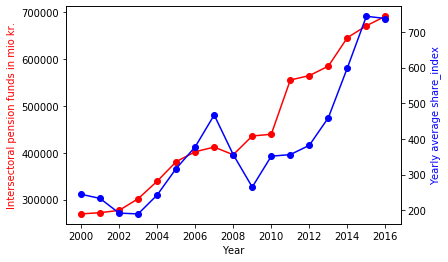

In [37]:
# Now, we will create a figure with 2 y-axis to firstly compare the Intersectoral pension funds and the yearly share index.
fig1,ax = plt.subplots()
ax.plot(Collective_Year, Collective_IP, color='red', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Intersectoral pension funds in mio kr.', color='red')

# Using twinx to create second axis.
ax2=ax.twinx()
ax2.plot(Collective_Year, Collective_SI, color = 'blue', marker='o')
ax2.set_ylabel('Yearly average share_index', color='blue')

From the figure it can be seen that the total number of Intersectoral pension funds follow the general trends of the yearly average share index in the period 2000-2016. This is in line with our previous analysis of the positive correlation between the two variables. Also, we see that the share index is falling in the beginning of the period, which can be explained by the IT Crisis, where the overvaluation of IT-companies created a stock market bubble. This might be the reason why we see such a slow rise in the intersectoral pension funds in the beginning of the period compared to the rest.
Further, we see a small fall in intersectoral pension funds in the year 2008 but a large drop in the yearly share index, which likely is explained by the financial crisis.

Text(0, 0.5, 'Yearly average share_index')

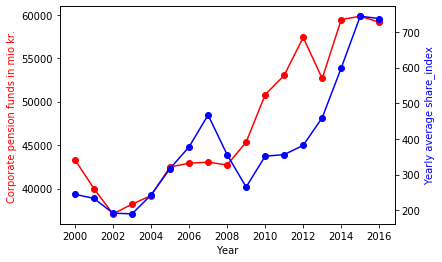

In [38]:
# Now creating a figure with corporate pension funds and the share_index.
# Creating Figure with 2 y-axis to compare pension funds and yearly share index.
fig2,ax = plt.subplots()
ax.plot(Collective_Year, Collective_CP, color='red', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Corporate pension funds in mio kr.', color='red')

# Using twinx to create second y_aix.
ax2=ax.twinx()
ax2.plot(Collective_Year, Collective_SI, color = 'blue', marker='o')
ax2.set_ylabel('Yearly average share_index', color='blue')

Like in the figure above we find that the corporate pension funds also follow the general trends of the yearly average share index. We do however see that the corporate pension is more volatile throughout the timeseries, as we see a large fall in the corporate pension funds during the IT crisis. We also see a fall in 2013. This cannot be explained by the share index, which is rising in the period. This contrast could be the reason why we find a higher correlation between intersectoral pension funds and the share index.

# Conclusion

As expected we found a strong correlation between pension funds and the yearly average share index and through our grapchical anlysis we found that both the intersectoral- and the corporate pension funds tend to follow the overall trends of the yearly average share index.